In [60]:
import matplotlib.pyplot as plt
import numpy as np

from spikit import *

In [5]:
binary = Binary(1e4, 10)
spike = StaticPowerLaw(binary, 7/3, 5.448e15)

gw = GravitationalWaves(binary)
df = DynamicalFrictionIso(spike)
acc = AccretionIso(spike)

risco = binary.Risco()

Text(0.5, 0, 'Separation $r_2$')

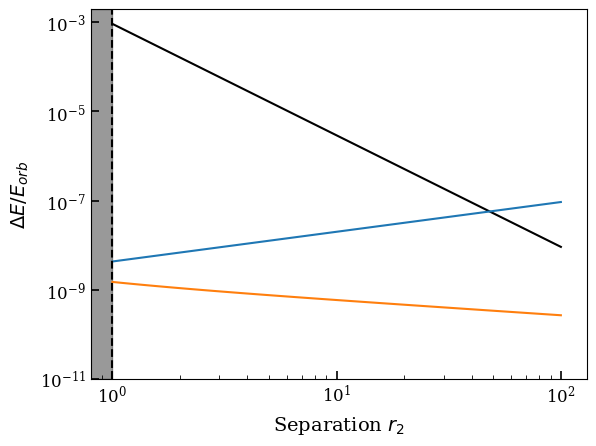

In [6]:
a = np.logspace(0, 2) *risco # [pc]
u = binary.u(a) # [m/s]

plt.loglog(a/risco, gw.dE_dt(a, 0)/-binary.Eorb(a) *binary.T(a), c = "black", label = "GW")
plt.loglog(a/risco, df.dE_dt(a, u)/-binary.Eorb(a) *binary.T(a), label = "Dynamical Friction")
plt.loglog(a/risco, acc.dE_dt(a, u)/-binary.Eorb(a) *binary.T(a), label = "Accretion")

plt.axvline(1, c = "black", ls = "--")
plt.axvspan(1, 0.5, color = "black", alpha = 0.4)
plt.xlim(left = 0.8)
plt.ylim(bottom = 1e-11)

plt.ylabel("$\Delta E / E_{orb}$")
plt.xlabel("Separation $r_2$")

/Users/mybook/Documents/Coding Packages/spikekit/spikit/spike.py:101: UserWarning: No spike density given, results MAY converge to vacuum case.
  warn("No spike density given, results MAY converge to vacuum case.")
/Users/mybook/Documents/Coding Packages/spikekit/spikit/spike.py:130: UserWarning: No spike density given, the spike's size is `infinite` and set to 1 pc.
  warn("No spike density given, the spike's size is `infinite` and set to 1 pc.")


(2.871336331230828e-09, 1.5e-08)

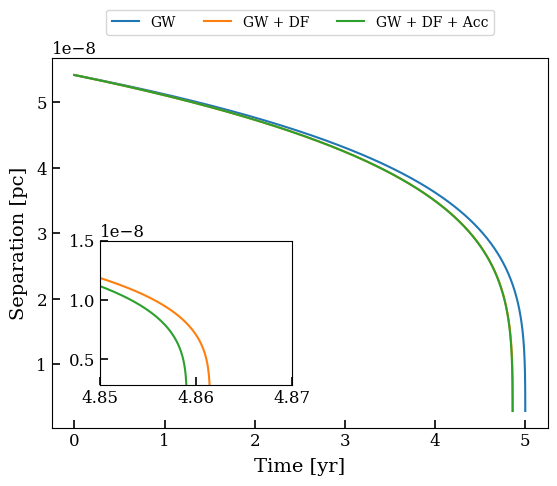

In [59]:
results_gw = DynamicSolver(binary, loss = gw).solve(VacuumMerger(binary).r(5 *yr), h = 1e-3)
results_df = DynamicSolver(binary, loss = [gw, df]).solve(VacuumMerger(binary).r(5 *yr), h = 1e-3)
results_all = DynamicSolver(binary, loss = [gw, df, acc]).solve(VacuumMerger(binary).r(5 *yr), h = 1e-3)

plt.plot(results_gw["t"]/yr, results_gw["a"], label = "GW")
plt.plot(results_df["t"]/yr, results_df["a"], label = "GW + DF")
plt.plot(results_all["t"]/yr, results_all["a"], label = "GW + DF + Acc")

plt.xlabel("Time [yr]")
plt.ylabel("Separation [pc]")
# The legend should be placed outside the plot, at the top.
plt.legend(loc = "upper center", bbox_to_anchor = (0.5, 1.15), ncol = 3)

# =============================================================================
plt.axes([0.2, 0.2, 0.3, 0.3])

plt.plot(results_df["t"]/yr, results_df["a"], c = "C1")
plt.plot(results_all["t"]/yr, results_all["a"], c = "C2")
plt.xlim(4.85, 4.87)
plt.ylim(risco, 1.5e-8)